# Prepare filelists for ISSAI TTS speakers 


In [1]:
import json 


def write_records_to_json(records, filename):
  """
  Writes a dictionary of records to a JSON file.

  Args:
    records: A dictionary where keys are speaker IDs and values are file paths.
    filename: The name of the JSON file to write to.
  """

  with open(filename, 'w') as f:
    json.dump(records, f)

def read_records_from_json(filename):
  """
  Reads a dictionary of records from a JSON file.

  Args:
    filename: The name of the JSON file to read from.

  Returns:
    A dictionary of records.
  """

  with open(filename, 'r') as f:
    return json.load(f)


speaker_metadata = read_records_from_json("../../../metadata/speaker_metadata.json")
speaker_metadata

{'F1': 'metadata/F1_manifest.csv',
 'F2': 'metadata/F2_manifest.csv',
 'F3': 'metadata/F3_manifest.csv',
 'M1': 'metadata/M1_manifest.csv',
 'M2': 'metadata/M2_manifest.csv'}

In [2]:
# See: https://github.com/espeak-ng/espeak-ng/blob/master/docs/languages.md
dir_data = "/home/temduck/vits2_unofficial/"
config = "../config.yaml"
symlink = "F1"
n_val = 100
n_test = 500

## Get hyperparameters from config file


In [3]:
import pandas as pd
from utils.hparams import get_hparams_from_file

hps = get_hparams_from_file(config)

## Read dataset

Here ISSAI dataset speakers 

In [5]:
speakers_datasets = {}
for speaker_id in speaker_metadata.keys():
    speakers_datasets[speaker_id] = pd.read_csv(dir_data+speaker_metadata[speaker_id],
                                                names=["file", "text"], header=0)

# EDA speakers text 

In [12]:
import pandas as pd
with_nums = pd.read_csv("with_nums.csv")
import sys 
sys.path.append("/home/temduck/vits2_pytorch/text")
from cleaners import kazakh_cleaners_issaitts

for text in with_nums.text.to_list():
    print("original ",text+"\nnoiseʨɕ»–«—|̆“|”…−－●")
    print("processed", kazakh_cleaners_issaitts(text+"\nnoiseʨɕ»–«—|̆“|”…−－●"), end="\n")

FileNotFoundError: [Errno 2] No such file or directory: 'with_nums.csv'

In [ ]:
speakers_datasets["F3"][mask]

,file,text
2166,F3/Audio/inform_3773-3785_165.wav,"кері қарай бұрылып, 6алты жүз елу жетінші үйге..."
2203,F3/Audio/inform_751-772_010.wav,аталған факті ақтөбе облыстық полиция департам...
3243,F3/Audio/inform_3871-3878_047.wav,2008 жылы ақтөбеде әбілқайыр хан даңғылында тә...
4865,F3/Audio/inform_949-953_076.wav,"тараптар механикаландырылған суару, телекоммун..."
9257,F3/Audio/inform_3655-3667_206.wav,"бейресми бағалауларға сәйкес, қазіргі кезде ка..."
11275,F3/Audio/inform_853-864_039.wav,қазір алматыда жазушылар одағының 360 мүшесі т...
11324,F3/Audio/inform_3786-3798_027.wav,"бірінші, екінші тармақтарымен кінәлі деп таныл..."
15449,F3/Audio/inform_3693-3703_191.wav,қолданбалы этносаяси зерттеулер институтының б...
18304,F3/Audio/inform_853-864_045.wav,одақтың тікелей ұсынысы бойынша 150 грант таға...
18868,F3/Audio/inform_751-772_129.wav,барлық трансқұрлықтық бағыттағы жолдардың 70 п...


In [ ]:
from tqdm import tqdm
from collections import defaultdict

def get_charset(manifest_data):
    charset = defaultdict(int)
    for row in tqdm(manifest_data, desc="Computing character set"):
        text = row['cleaned_text']
        for character in text:
            charset[character.lower()] += 1
    return charset


In [ ]:
for speaker_id in speaker_metadata.keys():
    message = "character set count of {}, is {}".format(speaker_id, len(speaker_metadata[speaker_id]))
    print(message)

character set count of F1, is 24
character set count of F2, is 24
character set count of F3, is 24
character set count of M1, is 24
character set count of M2, is 24


In [ ]:
import re
import string
from tqdm import tqdm
from text_utils import contains_non_kazakh_chars, normalize_text
from chars_maps import cyrillic_mapping
import sys 
sys.path.append("/home/temduck/vits2_pytorch/text")
from cleaners import kazakh_cleaners_issaitts
tqdm.pandas()

speaker_metadata = read_records_from_json("../../../metadata/speaker_metadata.json")
speakers_datasets = {}
for speaker_id in speaker_metadata.keys():
    speakers_datasets[speaker_id] = pd.read_csv(dir_data+speaker_metadata[speaker_id],
                                                names=["file", "text"], header=0)

table = str.maketrans(dict.fromkeys('!"#$%&\'()*+/:;<=>?@[\\]^_`{|}~'))
for speaker_id in speaker_metadata.keys():
    speakers_datasets[speaker_id]["text"] =  speakers_datasets[speaker_id]["text"].progress_apply(lambda text: ''.join(cyrillic_mapping.get(char, char) for char in text))
    speakers_datasets[speaker_id]["text"] = speakers_datasets[speaker_id]["text"].apply(lambda x: x.translate(table))
    speakers_datasets[speaker_id]["cleaned_text"] = speakers_datasets[speaker_id]["text"].progress_apply(kazakh_cleaners_issaitts)
    # speaker_metadata[speaker_id] = get_charset(speakers_datasets[speaker_id].to_dict(orient="records"))

# contains_other_lang = {}
# for speaker_id in speaker_metadata.keys():
#     mask = speakers_datasets[speaker_id]["contains_other_lang"]
#     contains_other_lang[speaker_id] = speakers_datasets[speaker_id][mask].copy(deep=True)
#     print(speaker_id, speakers_datasets[speaker_id]["contains_other_lang"].sum(), len(speaker_metadata[speaker_id]))
#     speaker_metadata[speaker_id] = get_charset(contains_other_lang[speaker_id].to_dict(orient="records"))
#     wrong_chars = {i: j for i, j in speaker_metadata[speaker_id].items() if contains_non_kazakh_chars(i)}
#     speaker_metadata[speaker_id] = wrong_chars
#     print(speaker_id, wrong_chars)

100%|██████████| 32903/32903 [00:07<00:00, 4376.50it/s]


In [ ]:
for speaker_id in speaker_metadata.keys():
    speaker_metadata[speaker_id] = get_charset(speakers_datasets[speaker_id].to_dict(orient="records"))
    print(len(speaker_metadata[speaker_id]))

Computing character set:   0%|          | 0/17426 [00:00<?, ?it/s]

Computing character set: 100%|██████████| 17426/17426 [00:00<00:00, 33936.10it/s]


39


Computing character set: 100%|██████████| 12921/12921 [00:00<00:00, 39681.14it/s]


39


Computing character set: 100%|██████████| 23696/23696 [00:00<00:00, 45312.07it/s]


39


Computing character set: 100%|██████████| 49250/49250 [00:00<00:00, 54252.85it/s]


39


Computing character set: 100%|██████████| 32903/32903 [00:00<00:00, 53147.05it/s]

39


In [ ]:
set(speaker_metadata["M1"].keys()) - set(speaker_metadata["M2"].keys())

set()

In [ ]:
speaker_metadata["M1"]

defaultdict(int,
            {'n': 262467,
             'ə': 367359,
             'j': 138154,
             'l': 35474,
             'e': 288228,
             'ɾ': 212171,
             ' ': 536030,
             'ʀ': 62883,
             'ɑ': 482008,
             'z': 65032,
             'ˈ': 540948,
             'p': 63713,
             'k': 105660,
             'ɵ': 34637,
             'ɡ': 42908,
             's': 164906,
             'ɪ': 212898,
             'ŋ': 58995,
             'b': 101547,
             'u': 36595,
             'h': 177,
             'm': 115321,
             'ɫ': 157581,
             'ʊ': 34035,
             'd': 163626,
             ',': 42690,
             'ʒ': 72673,
             '.': 47297,
             'ʃ': 56642,
             'w': 59512,
             't': 234283,
             'q': 124807,
             'o': 105684,
             'æ': 28611,
             'a': 15613,
             'x': 10971,
             'f': 5248,
             'v': 9582,
             'ʔ': 2

In [ ]:
speakers_datasets[speaker_id]

,file,text,cleaned_text
0,M2/Audio/tengrinewsblog_68_004.wav,Ендеше қалай мені жұмысқа алды\n,endeʃˈe qɑɫˈɑj menˈɪ ʒˈʊməsqɑ ˈɑɫdə
1,M2/Audio/tengrinewsblog_51_24.wav,Оның бір жылда қанша үстеме алатынын есептеу ү...,ˈonəŋ bˈɪɾ ʒəɫdɑ qɑnʃˈɑ ustemˈe ɑɫˈɑtənən esep...
2,M2/Audio/inform_2582_00.wav,Сәтбаев қаласында Қарағанды облысындағы алғашқ...,sætbɑˈev qɑɫˈɑsəndɑ qɑɾɑʀˈɑndə ˈobɫəsəndɑʀə ɑɫ...
3,M2/Audio/inform_1944_11.wav,"Бұдан бөлек, облыста екі жарым мыңнан астам ор...","bʊdˈɑn bɵlˈek, ˈobɫəstɑ ekˈɪ ʒˈɑɾəm məŋnɑn ɑst..."
4,M2/Audio/inform_1163_032.wav,Қазір біз он сегіз бүтін оннан бес миллионнан ...,qɑzˈɪɾ bˈɪz ˈon seɡˈɪz butˈɪn onnˈɑn bˈes məjɫ...
...,...,...,...
32898,M2/Audio/tengrinewsblog_54_039.wav,"Сайлау Қожағұлов, Қарлығаш Сарыбасова, өлкетан...","sɑjɫˈɑw qoʒɑʀʊɫˈov, qˈɑɾɫəʀɑʃ sˈɑɾəbɑsovɑ, ɵɫk..."
32899,M2/Audio/nur_171_15.wav,Үндістанда жерге тірідей көмілген нәресте ғажа...,undɪstɑndˈɑ ʒeɾɡˈe tɪɾɪdˈej kɵmɪɫɡˈen næɾestˈe...
32900,M2/Audio/inform_3461_10.wav,"Оның айтуынша, Алматы қаласы әкімдігінің қолда...","ˈonəŋ ˈɑjtwənʃɑ, ɑɫmˈɑtə qɑɫˈɑsə ækɪmdɪɡɪnˈɪŋ ..."
32901,M2/Audio/inform_907_020.wav,Мың тоғыз жүз отыз төртінші жылы Қазақстан Жаз...,məŋ tˈoʀəz ʒˈuz ˈotəz tɵɾtɪnʃˈɪ ʒəɫə qɑzɑqstˈɑ...


In [ ]:
import librosa 

librosa.

In [ ]:
! pip uninstall ffmpeg 

Found existing installation: ffmpeg 1.4
Uninstalling ffmpeg-1.4:
  Would remove:
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg-1.4.dist-info/*
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/*
  Would not remove (might be manually added):
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_ffmpeg.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_filters.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_probe.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_run.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_utils.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/_view.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/dag.py
    /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/ffmpeg/nodes.py
Proceed (Y/n)? ^C
ERROR: Oper

In [ ]:
import ffmpeg
import sys
from pprint import pprint # for printing Python dictionaries in a human-readable way

# read the audio/video file from the command line arguments
media_file = "/home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav "
# uses ffprobe command to extract all possible metadata from the media file
pprint(ffmpeg.probe(media_file)["streams"])

AttributeError: module 'ffmpeg' has no attribute 'probe'

In [ ]:
! ffmpeg -hide_banner -i /home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav 

Guessed Channel Layout for Input Stream #0.0 : mono
Input #0, wav, from '/home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav':
  Duration: 00:00:03.19, bitrate: 352 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 22050 Hz, mono, s16, 352 kb/s
At least one output file must be specified


In [ ]:
! ffmpeg -hide_banner  -i /home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav -f null -

Output #0, wav, to '/home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav':
Output file #0 does not contain any stream


In [ ]:
ffmpeg.probe() 

AttributeError: module 'ffmpeg' has no attribute 'probe'

In [ ]:
text

['Guessed Channel Layout for Input Stream #0.0 : mono',
 "Input #0, wav, from '/home/temduck/vits2_unofficial/F1/Audio/inform_601_00.wav':",
 '  Duration: 00:00:03.19, bitrate: 352 kb/s',
 '    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 22050 Hz, mono, s16, 352 kb/s',
 'At least one output file must be specified']

In [ ]:
# for speaker_id in speaker_metadata.keys():

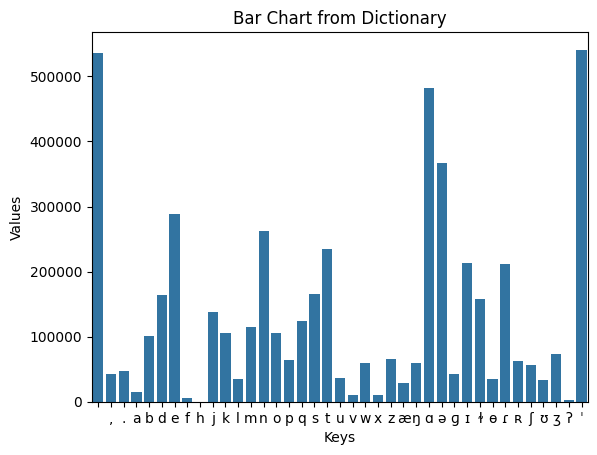

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(sorted(speaker_metadata["M1"].items()), columns=['Keys', 'Values'])
# Plotting
sns.barplot(x='Keys', y='Values', data=df)

# Adding title and labels
plt.title('Bar Chart from Dictionary')

# Display the plot
plt.show()

## Text cleaners

It may take a while, so better to preprocess the text and save it to a file in advance.

**Note** `phonemize_text` takes the longest time.`


In [ ]:
# Get index of tokenize_text
text_cleaners = hps.data.text_cleaners

token_idx = text_cleaners.index("tokenize_text")
token_cleaners = text_cleaners[token_idx:]
print(token_cleaners)


# Extract phonemize_text
def separate_text_cleaners(text_cleaners):
    final_list = []
    temp_list = []

    for cleaner in text_cleaners:
        if cleaner == "phonemize_text":
            if temp_list:
                final_list.append(temp_list)
            final_list.append([cleaner])
            temp_list = []
        else:
            temp_list.append(cleaner)

    if temp_list:
        final_list.append(temp_list)

    return final_list


text_cleaners = text_cleaners[:token_idx]
text_cleaners = separate_text_cleaners(text_cleaners)
print(text_cleaners)

['tokenize_text', 'add_bos_eos']
[['phonemize_text'], ['add_spaces']]


In [ ]:
for cleaners in text_cleaners:
    print(f"Cleaning with {cleaners} ...")

Cleaning with ['phonemize_text'] ...
Cleaning with ['add_spaces'] ...


In [ ]:
from text import tokenizer
from torchtext.vocab import Vocab
import torchtext

torchtext.disable_torchtext_deprecation_warning()

/home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [ ]:
speakers_datasets["F1"]["cleaned_text"] = speakers_datasets["F1"].text.progress_apply(lambda x: tokenizer(x, Vocab, ["phonemize_text"], language=hps.data.language))

  2%|▏         | 277/17426 [00:34<28:43,  9.95it/s]  /home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  6%|▌         | 1000/17426 [03:00<39:34:15,  8.67s/it]

In [ ]:
from text import tokenizer
from torchtext.vocab import Vocab
import torchtext

speaker_id = "M2"
torchtext.disable_torchtext_deprecation_warning()
data = speakers_datasets[speaker_id]
text_norm = data["text"].tolist()
for cleaners in text_cleaners:
    print(f"Cleaning with {cleaners} ...")
    if cleaners[0] == "phonemize_text":
        text_norm = tokenizer(text_norm, Vocab, cleaners, language=hps.data.language)
    else:
        for idx, text in enumerate(text_norm):
            temp = tokenizer(text, Vocab, cleaners, language=hps.data.language)
            text_norm[idx] = temp

data = data.assign(cleaned_text=text_norm)
data.head()

Cleaning with ['phonemize_text'] ...
Cleaning with ['add_spaces'] ...


,file,text,cleaned_text
0,M2/Audio/tengrinewsblog_68_004.wav,Ендеше қалай мені жұмысқа алды,e n d e ʃ ˈe <space> q ɑ ɫ ˈɑ j <space> m e n ...
1,M2/Audio/tengrinewsblog_51_24.wav,Оның бір жылда қанша үстеме алатынын есептеу ү...,ˈo n ə ŋ <space> b ˈɪ ɾ <space> ʒ ə ɫ d ɑ <spa...
2,M2/Audio/inform_2582_00.wav,Сәтбаев қаласында Қарағанды облысындағы алғашқ...,s æ t b ɑ ˈe v <space> q ɑ ɫ ˈɑ s ə n d ɑ <spa...
3,M2/Audio/inform_1944_11.wav,"Бұдан бөлек, облыста екі жарым мыңнан астам ор...","b ʊ d ˈɑ n <space> b ɵ l ˈe k , <space> ˈo b ɫ..."
4,M2/Audio/inform_1163_032.wav,Қазір біз он сегіз бүтін оннан бес миллионнан ...,q ɑ z ˈɪ ɾ <space> b ˈɪ z <space> ˈo n <space>...


In [ ]:
len(text_norm)

23696

In [ ]:
data.shape

(12921, 3)

## Generate and save vocabulary


In [ ]:
data = speakers_datasets[speaker_id]

In [ ]:
from torchtext.vocab import build_vocab_from_iterator
from utils.task import load_vocab, save_vocab
from text.symbols import special_symbols, UNK_ID
from typing import List


def yield_tokens(cleaned_text: List[str]):
    for text in cleaned_text:
        yield text.split()


text_norm = data["cleaned_text"].tolist()
vocab = build_vocab_from_iterator(yield_tokens(text_norm), specials=special_symbols)
vocab.set_default_index(UNK_ID)

vocab_file = f"../vocab_{speaker_id}.txt"
save_vocab(vocab, vocab_file)

vocab = load_vocab(vocab_file)
print(f"Size of vocabulary: {len(vocab)}")
print(vocab.get_itos())

/home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/temduck/anaconda3/envs/vits2/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


Size of vocabulary: 54959
['<pad>', '<unk>', '<bos>', '<eos>', '<space>', '<laugh>', 'ʒænˈe', 'məŋ', 'ekˈɪ', 'ʒˈuz', 'ˈon', 'mˈen', 'qɑzɑqstˈɑn', 'dˈep', 'bˈʊɫ', 'bˈɪɾ', 'ʒəjəɾmɑ', 'bˈojənʃɑ', 'bˈes', 'uʃˈɪn', 'ˈuʃ', 'tˈoʀəz', 'twɾˈɑɫə', 'ʒəɫə', 'tˈɵɾt', 'memlekettˈɪk', 'xɑbɑɾɫˈɑjdə', 'ˈonəŋ', 'qɑzɑqpɑɾˈɑt', 'dˈɑ', 'bɪɾɪnʃˈɪ', 'dedˈɪ', 'ɾˈespwbɫəjkɑsənəŋ', 'ˈosə', 'dejˈɪn', 'ˈoɫ', 'ʒˈʊməs', 'ˈɑɫtə', 'ˈotəz', 'seɡˈɪz', 'ʒetˈɪ', 'ʒɑŋˈɑ', 'dˈe', 'tɪɫʃɪsˈɪ.', 'butˈɪn', 'ˈeɫw', 'ˈʊɫttəq', 'ɑdˈɑm', 'onnˈɑn', 'ˈɵz', 'ʒəɫ', 'ɑtˈɑp', 'qɑzˈɑq', 'bˈɑs', 'bˈɑɾɫəq', 'pˈoɫəjtsəjja', 'sˈonəmen', 'qəɾəq', 'ælewmettˈɪk', 'toqsˈɑn', 'ekɪnʃˈɪ', 'ɾˈespwbɫəjkɑsə', 'boɫˈɑdə.', 'xˈɑɫəqɑɾɑɫəq', 'ˈɑɫ', 'bˈɑɾ', 'bˈɑɾ.', 'ɪʃɪndˈe', 'bˈoɫəp', 'bˈoɫdə.', 'tˈoʀəzənʃə', 'bˈɑsʃəsə', 'seksˈen', 'məjɫɫəjon', 'bˈɪz', 'ʒəɫdəŋ', 'bɪlˈɪm', 'deɡˈen', 'oɫˈɑɾdəŋ', 'memlekˈet', 'kejˈɪn', 'ɵtkˈen', 'qɑzɑqstˈɑnnəŋ', 'qɑzɪɾɡˈɪ', 'pˈen', 'ˈɑɫpəs', 'ˈobɫəstəq', 'ʒˈɑɫpə', 'ʒetpˈɪs', 'dejdˈɪ', 'ˈeŋ', 'teŋɡˈe', 'ɑɾnɑɫʀˈɑn', 'ɑɫmˈɑtə',

## Token cleaners


In [ ]:
from text import detokenizer

text_norm = data["cleaned_text"].tolist()
for idx, text in enumerate(text_norm):
    temp = tokenizer(text, vocab, token_cleaners, language=hps.data.language)
    assert UNK_ID not in temp, f"Found unknown symbol:\n{text}\n{detokenizer(temp)}"
    text_norm[idx] = temp

text_norm = ["\t".join(map(str, text)) for text in text_norm]
data = data.assign(tokens=text_norm)
data.head()

,file,text,cleaned_text,tokens
0,M2/Audio/tengrinewsblog_68_004.wav,Ендеше қалай мені жұмысқа алды,e n d e ʃ ˈe <space> q ɑ ɫ ˈɑ j <space> m e n ...,2\t12\t8\t14\t12\t30\t22\t4\t17\t7\t15\t10\t16...
1,M2/Audio/tengrinewsblog_51_24.wav,Оның бір жылда қанша үстеме алатынын есептеу ү...,ˈo n ə ŋ <space> b ˈɪ ɾ <space> ʒ ə ɫ d ɑ <spa...,2\t31\t8\t6\t29\t4\t23\t21\t11\t4\t24\t6\t15\t...
2,M2/Audio/inform_2582_00.wav,Сәтбаев қаласында Қарағанды облысындағы алғашқ...,s æ t b ɑ ˈe v <space> q ɑ ɫ ˈɑ s ə n d ɑ <spa...,2\t13\t38\t9\t23\t7\t22\t42\t4\t17\t7\t15\t10\...
3,M2/Audio/inform_1944_11.wav,"Бұдан бөлек, облыста екі жарым мыңнан астам ор...","b ʊ d ˈɑ n <space> b ɵ l ˈe k , <space> ˈo b ɫ...",2\t23\t41\t14\t10\t8\t4\t23\t37\t35\t22\t19\t3...
4,M2/Audio/inform_1163_032.wav,Қазір біз он сегіз бүтін оннан бес миллионнан ...,q ɑ z ˈɪ ɾ <space> b ˈɪ z <space> ˈo n <space>...,2\t17\t7\t26\t21\t11\t4\t23\t21\t26\t4\t31\t8\...


## Save train, val, test filelists


In [ ]:
speaker_id = "F1"
data = speakers_datasets[speaker_id]
data = data[["file", "text"]]
data["text"] =  data["text"].str.strip()
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.iloc[n_val + n_test:]
data_val = data.iloc[:n_val]
data_test = data.iloc[n_val: n_val + n_test]

data_train.to_csv("/home/temduck/vits2_pytorch/filelists/{}_train_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_val.to_csv("/home/temduck/vits2_pytorch/filelists/{}_val_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_test.to_csv("/home/temduck/vits2_pytorch/filelists/{}_test_filelist.txt".format(speaker_id), sep="|", index=False, header=False)

/tmp/ipykernel_137693/4250501940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"] =  data["text"].str.strip()


In [ ]:
speakers_datasets[speaker_id]

,file,text,cleaned_text
0,F1/Audio/inform_3356_11.wav,елдегі шектеу шараларына қарамастан палата мам...,eɫdeɡˈɪ ʃektˈew ʃɑɾɑɫˈɑɾənɑ qɑɾɑmɑstˈɑn pɑɫɑtˈ...
1,F1/Audio/inform_2803_08.wav,сондықтан рейд күн сайын өткізіліп тұрады.,sˈondəqtɑn ɾˈejd kˈun sˈɑjən ɵtkɪzɪlˈɪp tʊɾˈɑdə.
2,F1/Audio/inform_1163_032.wav,бүгінде еліміздің жаңғыру үлгісін қазақстан жо...,buɡɪndˈe elɪmɪzdˈɪŋ ʒˈɑŋʀəɾw uɫɡɪsˈɪn qɑzɑqstˈ...
3,F1/Audio/inform_1960_022.wav,мен институт қабырғасында көптеген жарыстарға ...,mˈen əjnstəjtwt qˈɑbəɾʀɑsəndɑ kɵpteɡˈen ʒˈɑɾəs...
4,F1/Audio/inform_2022_07.wav,оның ішінде алты жүз елу алты пәтерлі он бір н...,ˈonəŋ ɪʃɪndˈe ˈɑɫtə ʒˈuz ˈeɫw ˈɑɫtə pæteɾlˈɪ ˈ...
...,...,...,...
17421,F1/Audio/inform_805_04.wav,әкесі ертерек дүниеден озғандықтан аманжоловта...,ækesˈɪ eɾteɾˈek dˈunəjeden ozʀˈɑndəqtɑn ɑmɑnʒo...
17422,F1/Audio/inform_3407_12.wav,мұндай шекті мерзім халықтың көші-қоны туралы ...,mʊndˈɑj ʃektˈɪ meɾzˈɪm xˈɑɫəqtəŋ kɵʃˈɪqˈonə tw...
17423,F1/Audio/inform_800_02.wav,"естеріңізге сала кетелік, қазақстан құрамасы д...","esteɾɪŋɪzɡˈe sɑɫˈɑ ketelˈɪk, qɑzɑqstˈɑn qʊɾɑmˈ..."
17424,F1/Audio/inform_1129_01.wav,бүгін жанкүйерлер е тобындағы англияның ливерп...,buɡˈɪn ʒɑnkujeɾlˈeɾ ˈe tˈobəndɑʀə ˈɑnɡɫəjjanəŋ...


In [ ]:
speaker_id = "F2"
data = speakers_datasets[speaker_id]
data = data[["file", "cleaned_text", "text"]]
data["text"] =  data["text"].str.strip()
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.iloc[n_val + n_test:]
data_val = data.iloc[:n_val]
data_test = data.iloc[n_val: n_val + n_test]


data_train[["file", "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_train_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_val[["file", "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_val_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_test[["file", "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_test_filelist.txt".format(speaker_id), sep="|", index=False, header=False)

data_train[["file", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_train_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)
data_val[["file", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_val_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)
data_test[["file", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_test_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)

In [ ]:
speakers_datasets["F1"]["speaker_id"] = 0
speakers_datasets["F2"]["speaker_id"] = 1
speakers_datasets["F3"]["speaker_id"] = 2
speakers_datasets["M1"]["speaker_id"] = 3
speakers_datasets["M2"]["speaker_id"] = 4

In [ ]:
pd.concat([*speakers_datasets.values()]).reset_index(drop=True)

,file,text,cleaned_text,speaker_id
0,F1/Audio/inform_3356_11.wav,елдегі шектеу шараларына қарамастан палата мам...,eɫdeɡˈɪ ʃektˈew ʃɑɾɑɫˈɑɾənɑ qɑɾɑmɑstˈɑn pɑɫɑtˈ...,0
1,F1/Audio/inform_2803_08.wav,сондықтан рейд күн сайын өткізіліп тұрады.,sˈondəqtɑn ɾˈejd kˈun sˈɑjən ɵtkɪzɪlˈɪp tʊɾˈɑdə.,0
2,F1/Audio/inform_1163_032.wav,бүгінде еліміздің жаңғыру үлгісін қазақстан жо...,buɡɪndˈe elɪmɪzdˈɪŋ ʒˈɑŋʀəɾw uɫɡɪsˈɪn qɑzɑqstˈ...,0
3,F1/Audio/inform_1960_022.wav,мен институт қабырғасында көптеген жарыстарға ...,mˈen əjnstəjtwt qˈɑbəɾʀɑsəndɑ kɵpteɡˈen ʒˈɑɾəs...,0
4,F1/Audio/inform_2022_07.wav,оның ішінде алты жүз елу алты пәтерлі он бір н...,ˈonəŋ ɪʃɪndˈe ˈɑɫtə ʒˈuz ˈeɫw ˈɑɫtə pæteɾlˈɪ ˈ...,0
...,...,...,...,...
136191,M2/Audio/tengrinewsblog_54_039.wav,"Сайлау Қожағұлов, Қарлығаш Сарыбасова, өлкетан...","sɑjɫˈɑw qoʒɑʀʊɫˈov, qˈɑɾɫəʀɑʃ sˈɑɾəbɑsovɑ, ɵɫk...",4
136192,M2/Audio/nur_171_15.wav,Үндістанда жерге тірідей көмілген нәресте ғажа...,undɪstɑndˈɑ ʒeɾɡˈe tɪɾɪdˈej kɵmɪɫɡˈen næɾestˈe...,4
136193,M2/Audio/inform_3461_10.wav,"Оның айтуынша, Алматы қаласы әкімдігінің қолда...","ˈonəŋ ˈɑjtwənʃɑ, ɑɫmˈɑtə qɑɫˈɑsə ækɪmdɪɡɪnˈɪŋ ...",4
136194,M2/Audio/inform_907_020.wav,Мың тоғыз жүз отыз төртінші жылы Қазақстан Жаз...,məŋ tˈoʀəz ʒˈuz ˈotəz tɵɾtɪnʃˈɪ ʒəɫə qɑzɑqstˈɑ...,4


In [ ]:
speaker_id = "issai_audio_sid_text"
data = pd.concat([*speakers_datasets.values()]).reset_index(drop=True)
# data = data[["file", "speaker_id", "cleaned_text", "text"]]
data["text"] =  data["text"].str.strip()
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.iloc[n_val + n_test:]
data_val = data.iloc[:n_val]
data_test = data.iloc[n_val: n_val + n_test]


data_train[["file", "speaker_id",  "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_train_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_val[["file", "speaker_id", "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_val_filelist.txt".format(speaker_id), sep="|", index=False, header=False)
data_test[["file", "speaker_id", "text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_test_filelist.txt".format(speaker_id), sep="|", index=False, header=False)

data_train[["file", "speaker_id", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_train_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)
data_val[["file", "speaker_id", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_val_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)
data_test[["file", "speaker_id", "cleaned_text"]].to_csv("/home/temduck/vits2_pytorch/filelists/{}_test_filelist.txt.cleaned".format(speaker_id), sep="|", index=False, header=False)

In [ ]:
data = pd.concat([*speakers_datasets.values()]).reset_index(drop=True)

In [ ]:
data[["file", "speaker_id",  "text"]]

,file,speaker_id,text
0,F1/Audio/inform_3356_11.wav,0,елдегі шектеу шараларына қарамастан палата мам...
1,F1/Audio/inform_2803_08.wav,0,сондықтан рейд күн сайын өткізіліп тұрады.
2,F1/Audio/inform_1163_032.wav,0,бүгінде еліміздің жаңғыру үлгісін қазақстан жо...
3,F1/Audio/inform_1960_022.wav,0,мен институт қабырғасында көптеген жарыстарға ...
4,F1/Audio/inform_2022_07.wav,0,оның ішінде алты жүз елу алты пәтерлі он бір н...
...,...,...,...
136191,M2/Audio/tengrinewsblog_54_039.wav,4,"Сайлау Қожағұлов, Қарлығаш Сарыбасова, өлкетан..."
136192,M2/Audio/nur_171_15.wav,4,Үндістанда жерге тірідей көмілген нәресте ғажа...
136193,M2/Audio/inform_3461_10.wav,4,"Оның айтуынша, Алматы қаласы әкімдігінің қолда..."
136194,M2/Audio/inform_907_020.wav,4,Мың тоғыз жүз отыз төртінші жылы Қазақстан Жаз...


# clean data 

In [21]:
import re
from phonemizer.backend import EspeakBackend
import text_normalizer as nums_normalizer
from symbols import cyrillic_mapping
from tqdm import tqdm 
tqdm.pandas()

_numerals = [
    (re.compile(x[0]), x[1])
    for x in [
        (r'\b(3[01]|[12][0-9]|[1-9])\s(қаңтар|ақпан|наурыз|сәуір|мамыр|маусым|шілде|тамыз|қыркүйек|қазан|қараша|желтоқсан)', '_replace_nums_pair_word'), # nums pair kazakh month
        (r'\b\d{4}\s(жыл)', '_replace_nums_pair_word'), # nums pair kazakh year        
        (r'\b\d{1,3}\b', '_replace_nums'), # hundreds 
        (r'[а-яА-ЯӘәҒғҚқҢңӨөҰұҮүҺһІі]+\d+', '_remove_nums'), # kazakh word with digit
        (r'\d+[а-яА-ЯӘәҒғҚқҢңӨөҰұҮүҺһІі]+', '_remove_nums'), # digit with kazakh word 
        (r'\d+-[інші|ыншы|сыншы|ші|шы]', '_replace_ordinal_nums'),  # ordianal numerals with suffix 
        (r'\d+-(ден|тан|тен)', '_replace_group_nums') # group numerals with suffix 
    ]
]

_issaitts_trash = [
    ((re.compile("%s" % x[0], re.IGNORECASE), x[1]))
    for x in [
        ('–|—|−|－', '-'),
        ("\n|noise|ʨ|ɕ|»|–|«|—|̆|“|”|…|−|－|●", '')
    ]
]


def expand_numbers(text):
    for regex, replacement_func_name in _numerals:
        replacement_func = getattr(nums_normalizer, replacement_func_name)
        text = regex.sub(replacement_func, text)
    return text

def remove_trash(text):
    for regex, replacement in _issaitts_trash:
        text = re.sub(regex, replacement, text)
    return text
def lowercase(text):
    return text.lower()


def kazakh_cleaners_issaitts(text):
    """Pipeline for Kazakh tts speakers datasets text, including num2words, + punctuation + g2p"""
    table = str.maketrans(dict.fromkeys('#$%&\'()*+/:;<=>@[\\]^_`{|}~'))
    text = lowercase(text)
    text = expand_numbers(text)
    text = text.translate(table)
    text = ''.join(cyrillic_mapping.get(char, char) for char in text)
    text = remove_trash(text)
    return text 


for speaker_id in speaker_metadata.keys():
    speakers_datasets[speaker_id]["normalized_text"] = speakers_datasets[speaker_id]["text"].progress_apply(kazakh_cleaners_issaitts)


  0%|          | 0/17426 [00:00<?, ?it/s]

100%|██████████| 32903/32903 [00:02<00:00, 15420.61it/s]


In [13]:
from tqdm import tqdm
from collections import defaultdict

def get_charset(manifest_data):
    charset = defaultdict(int)
    for row in tqdm(manifest_data, desc="Computing character set"):
        text = row['normalized_text']
        for character in text:
            charset[character.lower()] += 1
    return charset

In [22]:
for speaker_id in speaker_metadata.keys():
    speaker_metadata[speaker_id] = get_charset(speakers_datasets[speaker_id].to_dict(orient="records"))
    print(len(speaker_metadata[speaker_id]))

Computing character set: 100%|██████████| 17426/17426 [00:00<00:00, 47105.36it/s]


48


Computing character set: 100%|██████████| 12921/12921 [00:00<00:00, 47516.28it/s]


48


Computing character set: 100%|██████████| 23696/23696 [00:00<00:00, 47394.19it/s]


49


Computing character set: 100%|██████████| 49250/49250 [00:00<00:00, 60786.57it/s]


49


Computing character set: 100%|██████████| 32903/32903 [00:00<00:00, 56436.27it/s]

49


In [28]:
from phonemizer import phonemize
from phonemizer.separator import Separator
from phonemizer.backend import EspeakBackend
separator = Separator(word="<space>", phone=" ")
_punctuation = ';:,.!?¡¿—…"«»“”'
_preserved_symbols_re = re.compile(rf"[{_punctuation}]|<.*?>")
backend = EspeakBackend(language="kk", preserve_punctuation=True, with_stress=True, punctuation_marks=_preserved_symbols_re)

for speaker_id in speaker_metadata.keys():
    speakers_datasets[speaker_id]["text"] = speakers_datasets[speaker_id]["normalized_text"].progress_apply(
                                                                    lambda text: phonemize(
                                                                                    text,
                                                                                    language="kk",
                                                                                    backend="espeak",
                                                                                    strip=True,
                                                                                    preserve_punctuation=True,
                                                                                    with_stress=True,
                                                                                ))

  1%|          | 183/17426 [00:07<13:40, 21.02it/s]